# Our Dataset

The `beans` dataset contains images of bean plants sorted into three categories — two for diseased and one for healthy plants (dataset [source](https://github.com/AI-Lab-Makerere/ibean/)).

Our goal is to create a classifier that can predict, with reasonable accuracy, whether an image of a bean plant shows signs of disease or if it appears healthy.

We'll load in the data, display an image, and look at some of its details. There are multiple ways to download and store a dataset using TensorFlow. The data for this lesson is available for download [here](https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/beans_dataset.tar.gz) as a compressed `tar.gz` file, and has the following directory structure when uncompressed:

# 2. Loading the Dataset

In [1]:
import tarfile

def extract_tar_gz(file_path, output_path):
    with tarfile.open(file_path, 'r:gz') as tar:
        tar.extractall(path=output_path)

extract_tar_gz('beans_dataset.tar.gz', '.')

For each set of test, train, and validation images, we have three subfolders corresponding to the classes in our dataset:

-   `angular_leaf_spot`
-   `bean_rust`
-   `healthy`

Each of those folders contains images from the dataset. This particular directory structure pairs well with Keras' [image\_dataset\_from\_directory()](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) function.

We can load in the dataset using that function, and it will return a [tensorflow.data.Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) object that will store a batch of images and their corresponding labels as a tuple.


In [2]:
import tensorflow as tf

train_set = tf.keras.utils.image_dataset_from_directory(
    directory='beans/train/',
    labels='inferred',
    label_mode='categorical',
    batch_size=128,
    image_size=(500, 500),
    shuffle=False)

validation_set = tf.keras.utils.image_dataset_from_directory(
    directory='beans/validation/',
    labels='inferred',
    label_mode='categorical',
    batch_size=128,
    image_size=(500, 500),
    shuffle=False)

Found 1034 files belonging to 3 classes.
Found 133 files belonging to 3 classes.


# 3. Exploring the Data - I

Now that we have our training and validation sets loaded into variables, let's explore them a little. The training data has `1034` files belonging to 3 classes, and the validation data has `133` files belonging to 3 classes.

TensorFlow stores this data in a `Dataset` object that has its own set of [methods](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#methods_2). One of those methods, [take()](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take), allows us to extract an element from the `Dataset` object.

For instance, the following code will extract `1` element from `train_set` and store it as another `Dataset` object, `train_set_elem`:

In [4]:
train_set_elem = train_set.take(1)
train_set_elem

<_TakeDataset element_spec=(TensorSpec(shape=(None, 500, 500, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

A `Dataset` object stores the images and their labels as a tuple of Tensors. We can iterate over this tuple to get some information about our dataset.

In [7]:
for images, labels in train_set_elem:
    print(labels.shape, images.shape)

(128, 3) (128, 500, 500, 3)


In [10]:
for images, labels in train_set_elem:
    labels_shape = labels.shape
    print(f"Shape of the labels Tensor: {labels_shape}")
    images_shape = images.shape
    print(f"Shape of the images Tensor: {images_shape}")

Shape of the labels Tensor: (128, 3)
Shape of the images Tensor: (128, 500, 500, 3)


In [14]:
validation_set_elem = validation_set.take(1)

for images, labels in validation_set_elem:
    print(labels)

tf.Tensor(
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 

# 4. Exploring the Data - II

If you recall, when we loaded in the data, we encoded the labels as `'categorical'` vectors. As a result, all of our labels are one-hot encoded. In label Tensors, a `1` indicates that the image belongs to a particular class. To know which class the `1` represents, we can get the list of the class names in the order they appear in label Tensors by accessing the `class_names` attribute of the dataset:

In [19]:
train_set.class_names

['angular_leaf_spot', 'bean_rust', 'healthy']

Therefore:

-   The `[1. 0. 0.]` label indicates the corresponding image belongs to the `angular_leaf_spot` class.
-   The `[0. 1. 0.]` label indicates the corresponding image belongs to the `bean_rust` class.
-   The `[0. 0. 1.]` label indicates the corresponding image belongs to the `healthy` class.

Turning our attention to the shape of the images tensor, we saw that each image in our batch of `128` images has the shape `(500, 500, 3)`.

Considering what we learned earlier, we know that `500` corresponds to the width and height of our image in pixels. But what about the `3` that follows? This value specifies the number of channels of our image.

### Color Channels

A colored image is the sum of three different colors — red (R), green (G), and blue (B). An RGB image is stored as a multi-dimensional matrix in which each dimension contains pixels with numerical values corresponding to the color's intensity, ranging from `0` to `255`.

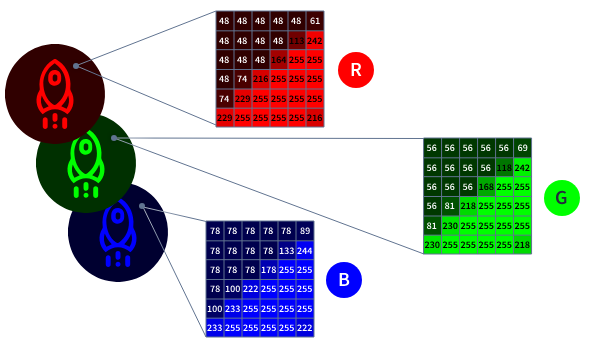

For comparison, a binary or grayscale image would only have a single channel. The pixels in that channel store values corresponding to the intensity or brightness of the image at each specific point (pixel). For grayscale images, the channel has values representing shades of gray. For binary images, the channel has values representing just two colors — black and white.

Since our images are stored in Tensors in batches of `128`, we can convert them all to NumPy arrays and use [matplotlib.pyplot.imshow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) to display any one of those images. While we can directly pass a Tensor to `imshow()` and have it implicitly convert it to a NumPy array for us, it's still good practice to explicitly convert Tensors to NumPy arrays when working with non-TensorFlow libraries to ensure compatibility and avoid potential issues.

Although our images store pixel values from `0` to `255`, the values are stored as floats and not as integers. When the array contains floats, matplotlib expects those values to be in the range of `[0, 1]`. A straightforward way to ensure we use the expected range is to simply divide the image array by `255`.

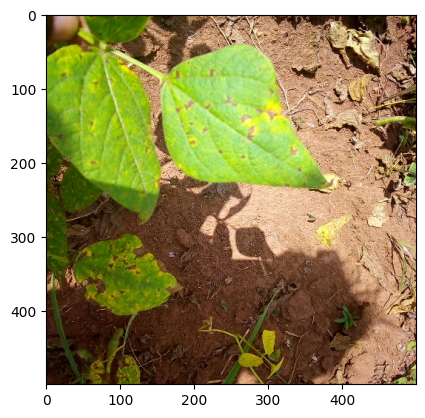

In [4]:
import matplotlib.pyplot as plt

train_set_elem = train_set.take(1)
for images, labels in train_set_elem:
    images = images.numpy()

plt.imshow(images[0]/255)
plt.show()

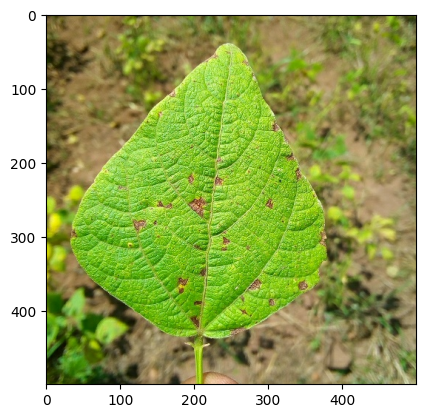

In [5]:
plt.imshow(images[64]/255)
plt.show()

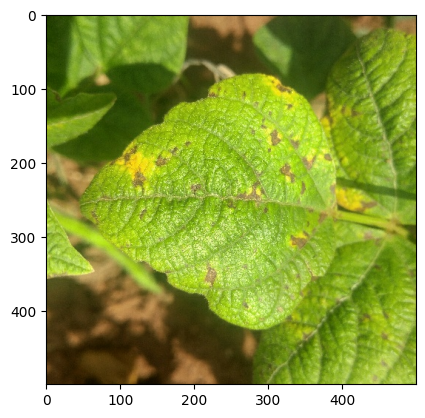

In [6]:
plt.imshow(images[127]/255)
plt.show()

# 5. Convolutions


After exploring our dataset, it's clear it contains a variety of images. Sometimes there are multiple leaves in a single image and sometimes not. The leaves aren't always in the center of the image either. At times, the leaf might be inverted or slightly rotated compared to another. Since the images were taken using a smartphone camera during different times of the day, there are also significant variations in lighting within the images.

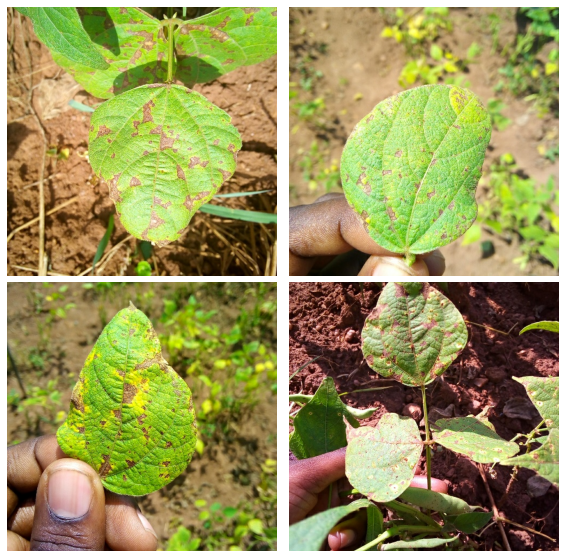

All of this variety makes it difficult for our model to learn the different relevant features of those leaves and accurately identify them in any given image.

For example, if our model wanted to learn how to recognize any website logo, it would have to learn different features or patterns of the logo. These features could be:

-   **Shape:** The model would need to learn the specific shapes that makes up the logo, such as circles, rectangles, or any other geometric forms that are part of the design.
-   **Colors:** The model would need to recognize the unique colors used in the logo, including the specific shades, and how they are distributed throughout the design.
-   **Spatial relationships:** The model would need to understand the relative positioning and arrangement of the different elements within the logo. This includes the relative size and orientation of the shapes and the text present in the logo.

However, if the logo were rotated, then the location of those edges and the color intensities would change as well. Our model should be able to learn those patterns in relation to one another instead of focusing on one pixel at a time.

This is what convolutions help us accomplish.

A convolution is a mathematical operation in which we take the element-wise product of a neighborhood of pixels in an image with a small matrix of numbers, called a **kernel** or a **filter**, then sum the result.

We then slide the kernel across the image, left to right, top to bottom, and repeat the operation.

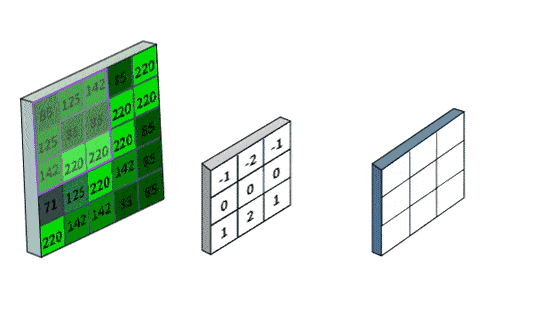

In [20]:
from IPython.display import Image

Image("m779-5.1.gif")

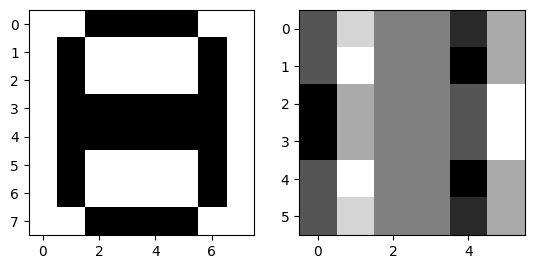

In [7]:
import numpy as np

image = np.array([[1, 1, 0, 0, 0, 0, 1, 1],
                  [1, 0, 1, 1, 1, 1, 0, 1],
                  [1, 0, 1, 1, 1, 1, 0, 1],
                  [1, 0, 0, 0, 0, 0, 0, 1],
                  [1, 0, 0, 0, 0, 0, 0, 1],
                  [1, 0, 1, 1, 1, 1, 0, 1],
                  [1, 0, 1, 1, 1, 1, 0, 1],
                  [1, 1, 0, 0, 0, 0, 1, 1]])

kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

conv_output = np.zeros((6, 6), dtype=int)

for row in range(conv_output.shape[0]):
    for col in range(conv_output.shape[1]):
        conv_output[row, col] = np.sum(np.multiply(image[row:row+kernel.shape[0],
                                                         col:col+kernel.shape[1]], kernel))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")

plt.subplot(1, 2, 2)
plt.imshow(conv_output, cmap="gray")

plt.show()

# 6. Convolutional Neural Networks (CNNs)

**A convolutional neural network (CNN)** consists of one or more **convolutional layers**. Each convolutional layer carries out a convolution operation like the one we saw above. An activation function, like ReLU, is applied to the output of a convolutional layer to give us a **feature** or **activation map**. That's the feature representation or pattern that our model tries to learn from the input.

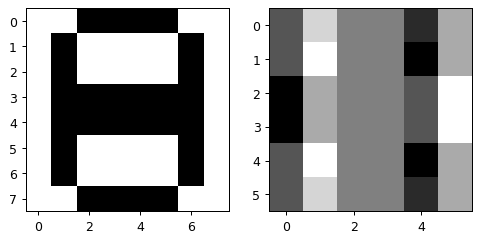

The output image on the right consists of vertical edges. The kernel we used, when convolved with our image, outputted an image that shows only the vertical edges from that input. The convolution operation with that specific kernel allowed us to extract a particular feature from the image — a vertical edge. We can transpose that kernel to get a different kernel with the following values:

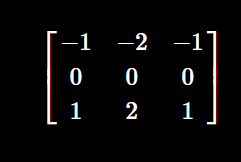



The above kernel, when convolved with the input image, would extract horizontal edges:

![](https://s3.amazonaws.com/dq-content/779/6.2-m779.png)

The kernel (or filter) is the weight matrix we apply across the entire input. Unlike the NNs we learned about previously, in CNNs we don't have one weight for every input. A kernel is re-used or shared across the entire image.

A convolutional layer can have multiple kernels stacked on top of each other. As the model trains, the backpropagation step updates the weights in each kernel, allowing the model to learn or extract different features from the input. If we want our model to extract horizontal edges, we don't have to manually set the kernel values to the ones we can see in the kernel above. The model learns those values all on its own!

For the leaves in our `beans` dataset, as the model trains and updates its kernels, it learns different features like the tip of a leaf, its base, the stem, veins, etc. It also learns features that differentiate a diseased leaf from a healthy one.

These kernels present us with multiple advantages:

-   They reduce the number of parameters our model tries to learn.
-   The patterns they learn are translation-invariant. Since we slide or translate the kernels across the image, they can learn patterns independent of where they are in the image.

Previously, we saw a single kernel applied to an image with just one channel. The process is no different when the input is an RGB image and we have multiple kernels in our convolutional layer. Since our input has three channels, the kernel will also have three channels, each corresponding to one of the input channels. During the convolution operation, the kernel is applied independently to each channel of the input, and the results are summed across channels to produce a single output value for each spatial position in the output feature map. This process effectively combines information from all three input channels and helps the CNN learn features that consider the relationships between channels.

For example, in the case of an RGB color image with three channels, the kernel will have three channels, with each channel in the kernel having its own set of weights. These weights are learned during the training process to capture the relevant features in each channel of the input image. If we had an image of shape 8x8x`3`, we could use a kernel of size 3x3x`3`. The width and height of the kernel (3x3) can be different than the input (8x8), but the number of channels should match (`3`). The number of channels in the filter (or kernel) is determined automatically based on the number of channels in the input image (or the output of the previous layer). We do not explicitly set the number of channels in the filter; it is handled automatically for us.

When defining a convolutional layer, we generally specify the number of filters and their spatial dimensions. The number of channels in each filter will match the number of channels in the input image (or the output of the previous layer) to ensure the convolution operation is performed correctly. For example, if we have four kernels, the output of the convolutional layer would look like the following:

![](https://s3.amazonaws.com/dq-content/779/6.1-m779.svg)

The output of the layer has four channels, also referred to as the width of the layer. There will be four feature maps obtained from the convolutional layer of size 6x6.

But a convolutional layer is not the only core part of a CNN. There are a few more steps we need to learn about.

# 7. Implementing a Convolutional Layer

In [23]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Input(shape=(500, 500, 3)))
model.add(layers.Conv2D(3, (3, 3), activation='relu', padding="same", strides=2))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 250, 250, 3)         │              84 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84 (336.00 B)

 Trainable params: 84 (336.00 B)

 Non-trainable params: 0 (0.00 B)

# 8. Padding and Strides

Our model's summary showed us that the output shape of our convolution layer was `(None, 250, 250, 3)`. In a previous example, a 3x3 kernel on an 8x8 image resulted in a 6x6 output. But now, the output dimensions are halved!

The reason for this surprising result is related to the two parameters we used to define our convolutional layer — `padding` and `strides`.

When we discussed translating or sliding our kernels across the input, we moved them one pixel at a time. But there's no specific restriction on that. We could move them by 2 pixels, and our resulting output would therefore be smaller. This is what the `strides` argument specifies. It's one of the many hyperparameters, like the number of filters and their sizes, that we can tune.

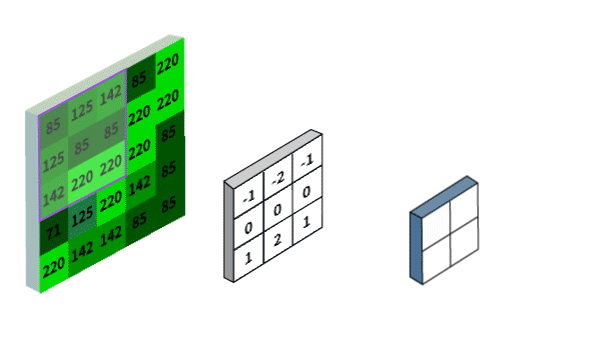

In [25]:
Image("m779-8.1.gif")

 As the kernel moved around the input pixels, the value at the center of the kernel didn't move across all the pixels of the input. We can conclude that none of the kernel values moved across *all* the pixels. Our convolutional operation was losing out on information as a result. Even when the stride was `1`, the kernel didn't capture all the pixels of the input. As a result, our output dimension shrunk: it went from 8x8 to 6x6.

If we'd inserted extra rows and columns (comprised entirely of 0s) to the top/bottom and left/right of the input, the kernel could've taken more pixels into account. That would've allowed it to extract more information from the input.

![](https://s3.amazonaws.com/dq-content/779/m779-8.2.gif)

This process of adding extra rows and columns comprised of 0s is referred to as padding the input. For a [`Conv2D` layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D), we have two options related to this:

-   `valid`: No padding is applied to the input.
-   `same`: The input is padded with zeros.

We can see the result of setting the padding to `same` in the animation above. The output of the convolution can have similar dimensions to the input, which can be helpful when deciding on the layers for our models. 

When we set the `padding` to `"same"` and `strides` to `2`, the output dimension was reduced by exactly half. If the stride was `1` instead, it would've stayed exactly the same.

Let's experiment a bit with these arguments. Before displaying the model summary, let's also try to anticipate what the output shape will be.

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='relu', padding="valid", strides=4, input_shape=(500, 500, 3)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 124, 124, 6)       456       
                                                                 
Total params: 456
Trainable params: 456
Non-trainable params: 0
_________________________________________________________________


In [10]:
model = models.Sequential()
model.add(layers.Conv2D(10, (5, 5), activation='relu', padding="same", strides=2, input_shape=(500, 500, 3)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 250, 250, 10)      760       
                                                                 
Total params: 760
Trainable params: 760
Non-trainable params: 0
_________________________________________________________________


In [11]:
model = models.Sequential()
model.add(layers.Conv2D(10, (7, 7), activation='relu', padding="same", strides=2, input_shape=(500, 500, 3)))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 250, 250, 10)      1480      
                                                                 
Total params: 1,480
Trainable params: 1,480
Non-trainable params: 0
_________________________________________________________________


# 9. Max Pooling and Fully-Connected Layers

Before we can move on to training and evaluating our model, there are two more crucial parts to a CNN that we need to learn about first — pooling and fully-connected layers.

From our model summaries, we see that the total number of parameters in our model is quite small. But our model is small and shallow. For much wider and deeper CNNs, the number of parameters can be quite large.

Training such complex models can be very computationally expensive. You may have noticed during our experiments above that changing the padding and number of strides did not change the number of model parameters. But that's because we're only using one layer in our model. With more layers, it's possible for the number of model parameters to change as we change the values for padding and strides. For example, increasing the number of strides results in smaller output dimensions and, therefore, fewer parameters to train in the subsequent layers. Another way to reduce the number of model parameters is to downsample the output through an operation called **pooling**.

To perform this operation, we divide the output of the convolution layer into neighbourhoods, usually of size 2x2, then extract only one value from that neighbourhood. There are many different kinds of pooling operations. One of the most common is called **max pooling**, wherein we extract the maximum value from each neighbourhood. By selecting the largest value, this operation tends to allow the model to focus on more important features.

We can see the max pooling operation in action below.

![](https://s3.amazonaws.com/dq-content/779/m779-9.1.gif)

A max pooling operation has its own set of attributes. For the operation shown above:

-   The size of the pooling window is `(2, 2)`.
-   The input is not padded.
-   The window is moved across the input with a stride of `2`.

As we can see, the operation downsampled a `(4, 4)` input into a `(2, 2)` output.

The final part of a CNN is dependent on the task we want it to perform. Our output currently has a shape of `(width, height, depth)`. But how can we use it to classify an image?

The process for a classification model is to flatten the output from the max pooling operation and feed it into a fully-connected layer. The fully-connected layer carries out the classification part using the features extracted from the convolution part.

The final layer will have to output a value corresponding to each class in our dataset. These values, based on the loss function we use, will give us the probability of the image belonging to each class.


In [28]:
model = models.Sequential()
model.add(layers.Input(shape=(500, 500, 3)))
model.add(layers.Conv2D(3, (3, 3), activation='relu', ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(3))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 498, 498, 3)         │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 249, 249, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 186003)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │         558,012 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 558,096 (2.13 MB)

 Trainable params: 558,096 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

# 10. Training and Evaluating a CNN Classifier

You have successully created a CNN!

![](https://s3.amazonaws.com/dq-content/779/10.1-m779.svg)

When we displayed our model's summary above, we saw that the number of parameters in our model was very high. This is largely due to the hyperparameter values we selected, as well as the flattening operation we performed. This is another reason why downsampling outputs of certain layers can be helpful. Go back and display the model summary after removing the max pooling layer. The difference in parameters will be surprising!

Trying to train large models on large images can often result in Out of Memory (OOM) errors because the hardware might not necessarily be able to store a large model and process the images at the same time. Although our bean plant images are rather large, the model we have built so far is quite simple so we should be fine for now. However, be advised when experimenting with model parameters that OOM errors can, and will, happen! When they do, we'll need to address it by either simplifying the model or reducing the size of the images.

It's time to train our model and see how well it is able to classify those leaves.

Our dataset has three classes, and our input labels are already one-hot encoded. We'll use the [Categorical Crossentropy Loss Function](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) for our model.

The Crossentropy loss function is similar to the log loss function used for Logistic Regression. It can be used for both binary and multi-class classification. For the former, the function is mathematically defined as:

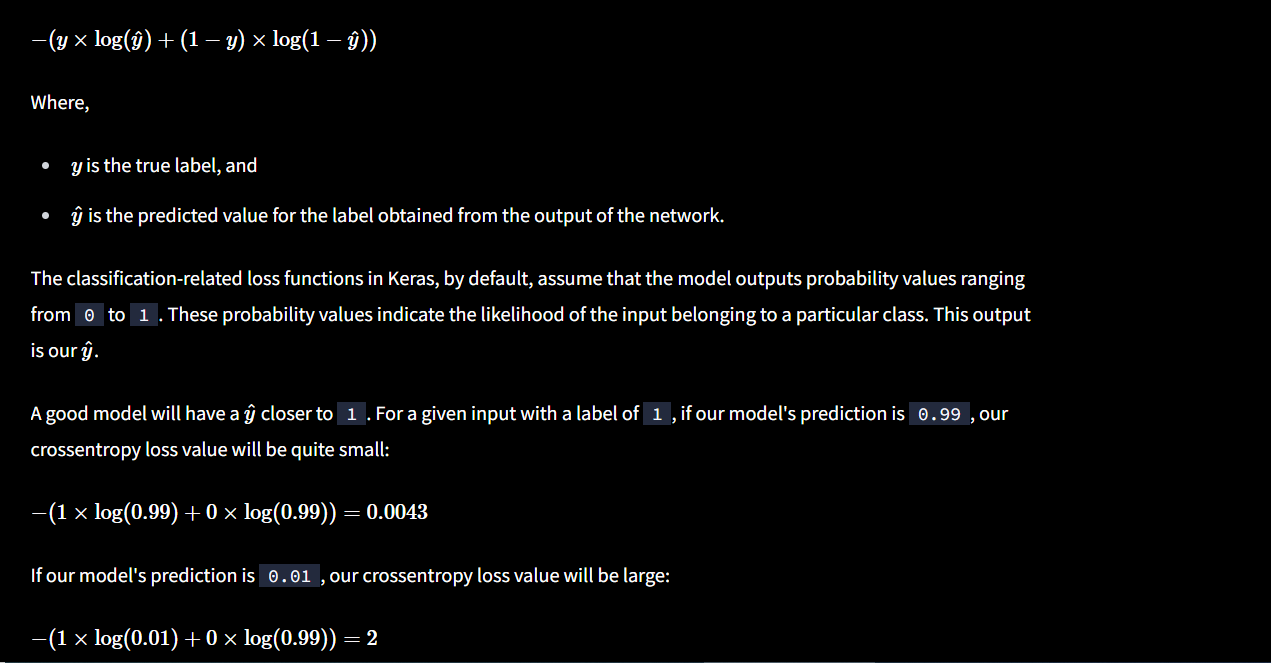

The better our model performs, the lower its loss will be. The worse our model performs, the higher the loss will be. Therefore, crossentropy loss function is a great option for a classification model. For multi-class classification, the loss function works in the same way for each class. We calculate the loss value for each label separately for every training iteration, then sum them.

A neural network's output layer can either output raw predictions, called logits, or we can apply an activation function to the layer to get probability values instead. While the latter is an option for us, when defining a loss function in Keras we can set the `from_logits` attribute of that loss function to `True` if we don't want to apply any activation function to the output layer. We'll follow this approach to train our model next.

We'll also evaluate our model on the test set. Tthe datasets that we loaded in are stored in `tensorflow.data.Dataset` objects. The [`evaluate()` method](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) in Keras allows us to pass in a `tensorflow.data.Dataset` object as input without the need of passing in the labels separately. We can therefore call the `evaluate()` method without having to separate the labels from the images first.

In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    directory='beans/test/',
    labels='inferred',
    label_mode='categorical',
    batch_size=128,
    image_size=(500, 500),
    shuffle=False)

model = models.Sequential()
model.add(layers.Input(shape= (500, 500, 3)))
model.add(layers.Conv2D(3, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(3))
model.summary()

opt = tf.keras.optimizers.Adam()
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

model.fit(train_set, epochs=1)

test_loss, test_acc = model.evaluate(test_set)

print(f"Test set accuracy: {test_acc}")

Found 128 files belonging to 3 classes.


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 498, 498, 3)         │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 249, 249, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 186003)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │         558,012 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 558,096 (2.13 MB)

 Trainable params: 558,096 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 694ms/step - accuracy: 0.3008 - loss: 20893.0449
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step - accuracy: 0.3359 - loss: 22215.5469
Test set accuracy: 0.3359375


Our model is not performing too well — ignoring how it may have done on the training data, it's only able to correctly classify unseen images ~33% of the time. While that's about the same as randomly guessing, this result is to be expected. 

* First of all, we didn’t normalize our inputs, which impacts CNNs just as much as other models. 
* Secondly, our model was a very simple one. The true power of deep learning models lies in their depth and complexity. A single convolutional layer and a fully-connected layer won't have much predictive power.